In [92]:
import numpy as np
import tensorflow as tf

In [93]:
import matplotlib.pyplot as plt
sess = tf.Session()

In [94]:
from sklearn import datasets

from tensorflow.python.framework import ops
ops.reset_default_graph()

iris = datasets.load_iris()

x_vals= np.array([x[0:3] for x in iris.data])
y_vals= np.array([x[3] for x in iris.data])
sess = tf.Session()

In [95]:
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8),replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))

x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]

y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

In [96]:
# converting Data in range of 0-1

In [97]:
def normalize_cols(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return (m - col_min) / (col_max -col_min)

x_vals_train = np.nan_to_num(normalize_cols(x_vals_train))
x_vals_test = np.nan_to_num(normalize_cols(x_vals_test))

In [98]:
batch_size = 50
x_data = tf.placeholder(shape=[None,3], dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1], dtype=tf.float32)


In [99]:
hidden_layer_nodes = 5
A1 = tf.Variable(tf.random_normal(shape=[3,hidden_layer_nodes]))
b1 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes]))
A2 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes,1]))
b2 = tf.Variable(tf.random_normal(shape=[1]))

In [100]:
hidden_output = tf.nn.relu(tf.add(tf.matmul(x_data,A1),b1))
final_output = tf.nn.relu(tf.add(tf.matmul(hidden_output,A2),b2))

In [101]:

################(((((((((((((((((( 2 ))))))))))))))))))#######################

loss = tf.reduce_mean(tf.square(y_vals -final_output))

In [102]:
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)

init = tf.initialize_all_variables()
sess.run(init)

In [103]:
loss_vec = []
test_loss = []
for i in range(50):
    # First we select a random set of indices from the batch
    rand_index = np.random.choice(len(x_vals_train),size=batch_size)
    # We then select the training values
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    
    # Now we run the training step
    sess.run(train_step,feed_dict={x_data:rand_x, y_target:rand_y})
    # We append the training loss
    temp_loss = sess.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})
    loss_vec.append(np.sqrt(temp_loss))
    
    # finally we run the test- set loss and save it
    test_temp_loss = sess.run(loss,feed_dict={x_data: x_vals_test, y_target:np.transpose([y_vals_test])})
    test_loss.append(np.sqrt(test_temp_loss))
    
    
    if(i+1)%5 == 0:   # Modulus operator %
        print( "Iteration No : " + str(i+1) + "    And Loss: " + str(temp_loss))
    

Iteration No : 5    And Loss: 1.8534555
Iteration No : 10    And Loss: 1.1949401
Iteration No : 15    And Loss: 1.2940097
Iteration No : 20    And Loss: 1.1044053
Iteration No : 25    And Loss: 0.99797374
Iteration No : 30    And Loss: 0.8942336
Iteration No : 35    And Loss: 0.9979114
Iteration No : 40    And Loss: 0.8788493
Iteration No : 45    And Loss: 0.8197234
Iteration No : 50    And Loss: 0.80440885


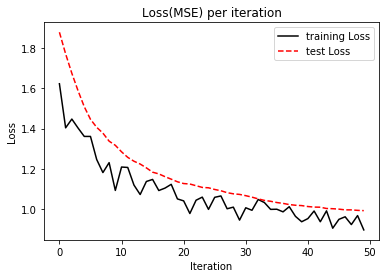

In [104]:
plt.plot(loss_vec, 'k-', label="training Loss")
plt.plot(test_loss, 'r--', label="test Loss")
plt.title('Loss(MSE) per iteration')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend(loc= 'upper right')
plt.show()